In [1]:
from matplotlib import pyplot as plt
import numpy as np
import hashlib
import pandas as pd
import re
import os
import sys

# Pattern handler

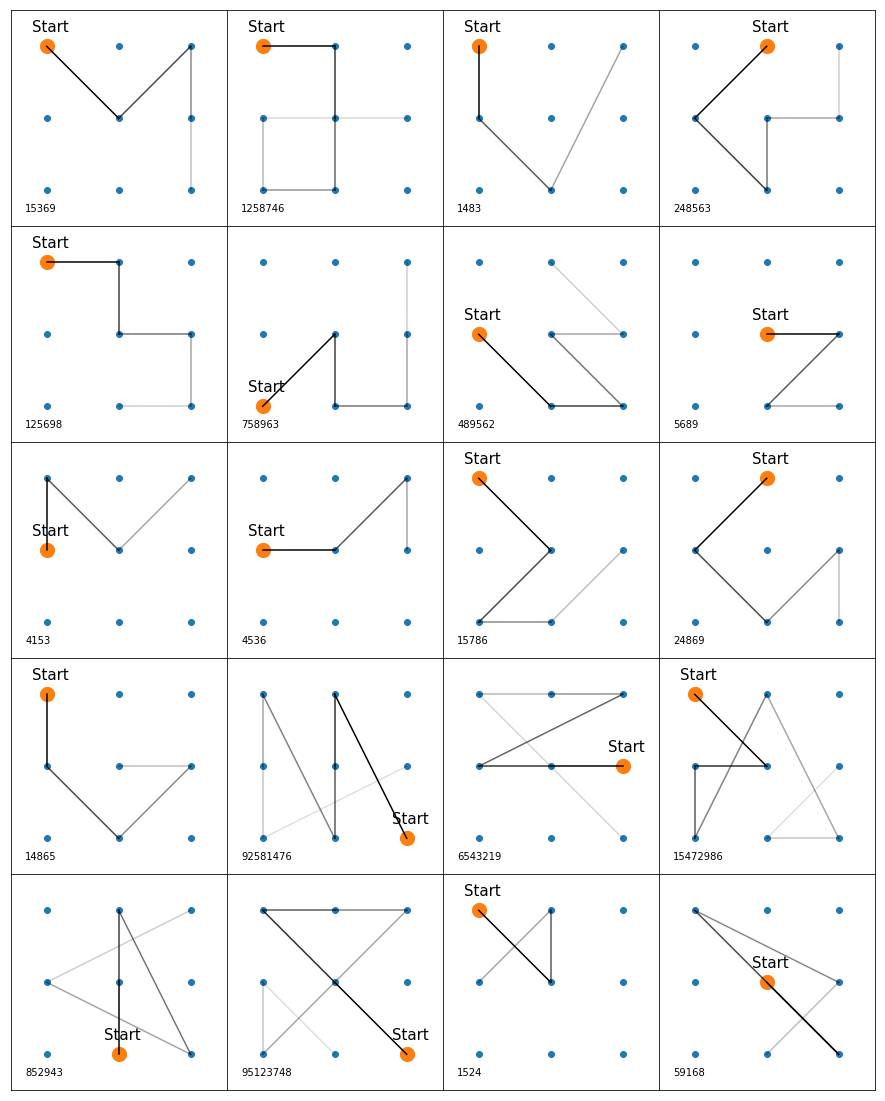

In [7]:
def make_patterns(n, seed_key):
    
    def make_pattern():
        n_dot = np.random.choice(range(4, 9), 1)
        pattern = np.random.choice(range(1, 10), n_dot, replace=False)
        pattern = "".join(str(i) for i in pattern)
        for s in blacklist:
            if not pattern.find(s) < 0:
                mid = blacklist_map[s]
                pattern = pattern.replace(s, s[0]+mid+s[1])
                i = pattern.replace(mid, "_", 1).find(mid)
                pattern = pattern if i < 0 else pattern[:i]+pattern[i+1:]
        return pattern

    seed = int(hashlib.sha1(seed_key.encode("utf8")).hexdigest()[10], 16)
    np.random.seed(seed)
    
    blacklist = "1346791728391937"
    blacklist = blacklist+blacklist[::-1]
    blacklist = [blacklist[i*2:i*2+2] for i in range(len(blacklist)//2)]
    blacklist_map = {s: str((int(s[0])+int(s[1]))//2) for s in blacklist}
    
    return [make_pattern() for _ in range(n)]


def draw_patterns(patterns):
    
    point_map = {str(i): [(i-1)%3, 2-(i-1)//3] for i in range(1, 10)}
    possible_points = np.array([point_map[str(i)] for i in range(1, 10)])
    possible_x, possible_y = possible_points[:, 0], possible_points[:, 1]

    plt.figure(figsize=(3, 3))
    n_pattern = len(patterns)
    for i, pattern in enumerate(patterns):
        points = np.array([point_map[c] for c in pattern])
        x, y = points[:, 0], points[:, 1]
        p = plt.axes([i%4, n_pattern-i//4, 1, 1])
        p.axis([-0.5, 2.5, -0.5, 2.5])
        l = len(x)
        for i in range(l):
            alpha = ((l-i)/l)**1.5
            p.plot(x[i:i+2], y[i:i+2], alpha=alpha, color='black')
        p.scatter(possible_x, possible_y)
        p.scatter(x[0], y[0], 200)
        p.text(x[0]-0.2, y[0]+0.2, "Start", fontsize=15)
        p.text(-0.3, -0.3, pattern)
        p.get_xaxis().set_visible(False)
        p.get_yaxis().set_visible(False)

    plt.show()
    
    
patterns = [
    '15369',
    '1258746',
    '1483',
    '248563',
    '125698',
    '758963',
    '489562', 
    '5689',
    '4153',
    '4536',
    '15786',
    '24869',
    '14865'
]+make_patterns(7, "seohasong")
draw_patterns(patterns)

patterns = sum([[c]*20 for c in patterns], [])
patterns += patterns
pd.to_pickle(patterns, "pattern-final")

# 만들자 데이터셋

In [8]:
sys.path.append(os.environ["SEOHASONG_LIBRARY"])
from dic_to import arrdic2xml


def set_test(seed_key, n_test, n_sample, texts, experiment, name):

    def get_arrdic(arr):
        arrdic = [
            {"configure": [
                {"experiment name='"+experiment+"-"+name+"'": [
                    {"challenge type='"+experiment+"'": text}
                    for text in arr
                ]}
            ]}
        ]
        return arrdic
    
#     seed = int(hashlib.sha1(seed_key.encode("utf8")).hexdigest()[10], 16)
#     np.random.seed(seed)
#     arrs = [np.random.choice(texts, n_sample) for i in range(n_test)]

    arrdic = get_arrdic(texts)
    bs = arrdic2xml.convert(arrdic)
    with open("./config.xml", "w") as f:
        f.write(str(bs))

# ko_speechs = pd.read_pickle("./ko-speech-final")
# en_speechs = pd.read_pickle("./en-speech-final")
# set_test("송서하", 4, 100, ko_speechs, "keyboard", "ko")
# set_test("송서하", 4, 100, en_speechs, "keyboard", "en")

patterns = pd.read_pickle("./pattern-final")
bs = set_test("송서하", 1, 0, patterns, "pattern", "beta")